# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Imports

In [1]:
#data and file manipulation
import pickle
import csv
import glob
import os
from PIL import Image

#vizualization
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

#randomizing and calculus
import random
import numpy as np

#shuflling and spliting
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#tensorflow
import tensorflow as tf
from tensorflow.contrib.layers import flatten

---
## Step 0: Load The Data

In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation exaples=",n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation exaples= 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

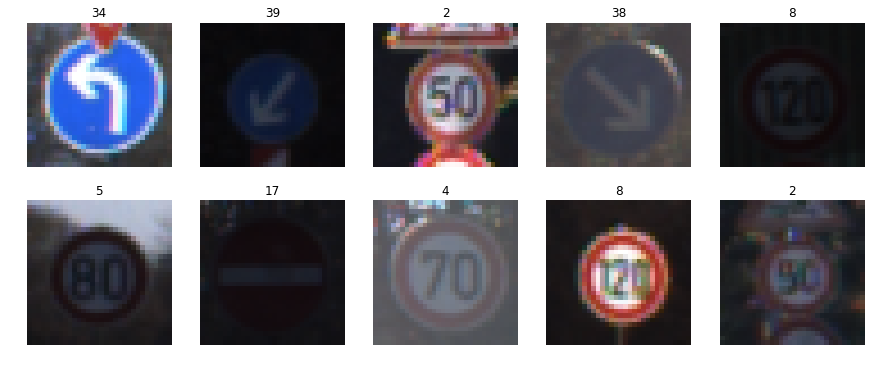

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
fig, axes = plt.subplots(2,5, figsize=(15, 6))
axes = axes.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axes[i].axis('off')
    axes[i].imshow(image)
    axes[i].set_title(y_train[index])
fig.savefig("./output_images/dataset_viz.png",bbox_inches="tight")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Preprocessing techniques used: 
* Grayscaling
* Normalization
* Adjusting brightness
* Adjusting scaling
* Shuffling
* Spliting

#### Common techniques:
- Grayscale - reducing the number of channels therefore the computation time on GPUs
- Normalization was done in range (-1/1).Used to change the range of pixel intensity values. Usually the image data should be normalized so that the data has mean zero and equal variance.

#### Augmentation data techniques: 
They are done to boost the classes that had less than 1000 samples 
- adjust brightness :to get rid of the dark pixels will improve general recognition of the images - Samples are uniformly distributed over the half-open interval [low, high]
- adjust scaling using perspective transformation. 
We need a 3x3 transformation matrix. 
Straight lines will remain straight even after the transformation. 
To find this transformation matrix, we need 4 points on the input image and corresponding points on the output image. 
Among these 4 points, 3 of them should not be collinear.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# Preprocess Data

# Convert to grayscale function
def grayscale(data_RGB):
    
    n_data=data_RGB.shape[0]
    data_gr=np.zeros((n_data,32,32,1))
    for i in range(n_data):
        tmp = cv2.cvtColor(data_RGB[i], cv2.COLOR_RGB2GRAY)
        data_gr[i]= np.reshape(tmp,(32,32,1))
    
    return data_gr



In [6]:
#Normalize the data
def normalize(data):
    return (data-128)/128


In [7]:
#adjusting brightness
def adjust_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst


In [8]:
#adjust scaling
def adjust_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

In [9]:
# Data set RGB images to gray scale
nX_train=grayscale(X_train)
nX_valid=grayscale(X_valid)
nX_test=grayscale(X_test)

print("Shapes after grayscaling!")
print("X_train shape:", nX_train.shape)
print("X_valid shape:", nX_valid.shape)
print("X_test shape:", nX_test.shape)

# Data set normalization
nX_train=normalize(nX_train)
nX_valid=normalize(nX_valid)
nX_test=normalize(nX_test)

print("Shapes after normalization!")
print("X_train shape:", nX_train.shape)
print("X_valid shape:", nX_valid.shape)
print("X_test shape:", nX_test.shape)

#copying back to original values
X_train = nX_train
X_valid = nX_valid
X_test = nX_test


Shapes after grayscaling!
X_train shape: (34799, 32, 32, 1)
X_valid shape: (4410, 32, 32, 1)
X_test shape: (12630, 32, 32, 1)
Shapes after normalization!
X_train shape: (34799, 32, 32, 1)
X_valid shape: (4410, 32, 32, 1)
X_test shape: (12630, 32, 32, 1)


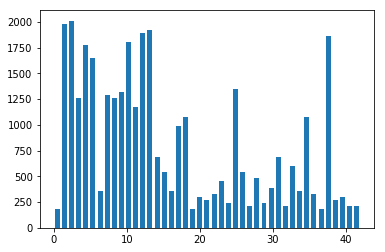

In [10]:
# histogram of label frequency (before data augmentation)
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
#plt.savefig('./output_images/classes_after_augmentation.png', bbox_inches='tight')


### Testing adjusting brightness

shape in/out: (32, 32, 1) (32, 32, 1)


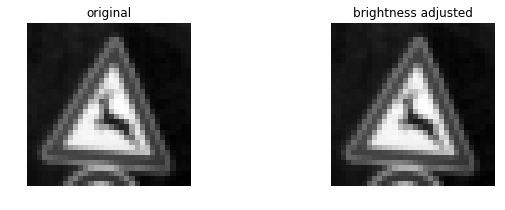

In [11]:
test_img = X_train[800]
test_dst = adjust_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('brightness adjusted')

print('shape in/out:', test_img.shape, test_dst.shape)

### Testing adjusting scaling

shape in/out: (32, 32, 1) (32, 32, 1)


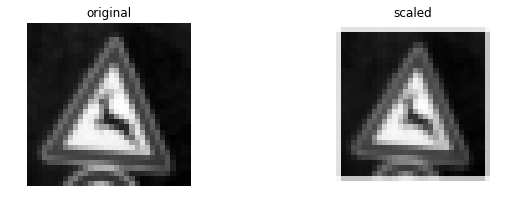

In [12]:
test_img = X_train[800]
test_dst = adjust_scaling(test_img)
    
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled')

print('shape in/out:', test_img.shape, test_dst.shape)

### Apply data augmentation techniques and concatenate to the X_Train set of images

In [13]:
from utils import active_session 
with active_session():
    print('X, y shapes:', X_train.shape, y_train.shape)

    input_indices = []
    output_indices = []

    for class_n in range(n_classes):
        print(class_n, ': ', end='')
        class_indices = np.where(y_train == class_n)
        n_samples = len(class_indices[0])
        if n_samples < 1000:
            for i in range(1000 - n_samples):
                input_indices.append(class_indices[0][i%n_samples])
                output_indices.append(X_train.shape[0])
                new_img = X_train[class_indices[0][i % n_samples]]
                new_img = adjust_scaling(adjust_brightness(new_img))
                X_train = np.concatenate((X_train, [new_img]), axis=0)
                y_train = np.concatenate((y_train, [class_n]), axis=0)
                if i % 50 == 0:
                    print('|', end='')
                elif i % 10 == 0:
                    print('-',end='')
            print('')
            
    print('X, y shapes:', X_train.shape, y_train.shape)

X, y shapes: (34799, 32, 32, 1) (34799,)
0 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|-
1 : 2 : 3 : 4 : 5 : 6 : |----|----|----|----|----|----|----|----|----|----|----|----|---
7 : 8 : 9 : 10 : 11 : 12 : 13 : 14 : |----|----|----|----|----|----|
15 : |----|----|----|----|----|----|----|----|----|
16 : |----|----|----|----|----|----|----|----|----|----|----|----|---
17 : |
18 : 19 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|-
20 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----
21 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|--
22 : |----|----|----|----|----|----|----|----|----|----|----|----|----|-
23 : |----|----|----|----|----|----|----|----|----|----|----
24 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
25 : 26 : |----|----|----|----|----|----|----|----|----|
27 : |----|----|----|----|----|----|----|----|----|----|----|---

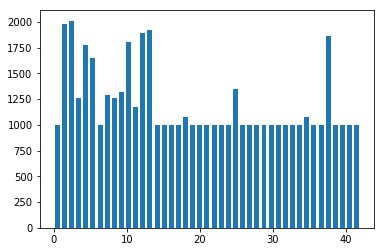

In [14]:

# histogram of label frequency after data augmentation
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
#plt.savefig("./output_images/classes_after_augmentation.png")



### Perform shuffling and spliting in 80/20 train/validation

In [15]:
# Train data set shuffling
X_train, y_train = shuffle(X_train, y_train)

# Dataset split 80/20 percentage
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X_train shape after split:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape after split:", X_validation.shape)
print("y_validation shape:", y_validation.shape)


X_train shape after split: (41352, 32, 32, 1)
y_train shape: (41352,)
X_validation shape after split: (10338, 32, 32, 1)
y_validation shape: (10338,)


### Model Architecture

### DNN Architecture chosen: LeNet-5

* Input => Convolution => ReLU => Pooling => Convolution => ReLU => Pooling => Flattening =>FullyConnected => ReLU => FullyConnected => ReLU => FullyConnected

#### This ConvNet follows these steps:

* Layer 1 (Convolutional): The output shape should be 28x28x6.

* Activation. ReLu.

* Pooling. The output shape should be 14x14x6.

* Layer 2 (Convolutional): The output shape should be 10x10x16.

* Activation. ReLu

* Pooling. The output shape should be 5x5x16.

* Flattening: Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. This should have 400 outputs.

* Layer 3 (Fully Connected): This should have 120 outputs.

* Activation. ReLu

* Layer 4 (Fully Connected): This should have 84 outputs.

* Activation. ReLu.

* Layer 5 (Fully Connected): This should have 43 outputs. This number represents also the number of classes.

#### Description of the model:
- model uses two convulutional layers:

* first will take as input the gray image and outputs a 6 filter matrix with kernel size set to 5 and smale stride for going in detail over the image.
* second will will have much more filters 16 and a bigger stride since this layer is also responsable for recognizing new images that are outside of the train or validation datasets.
- model uses ReLu as activation function for each of the convolutional layers and itermediate fully connected layers for efficent computation and better gradient propagation trying to eliminate vanishing gradient problems.
- model uses two Pooling layers after each convolutional layers to to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network therefore preventing overfitting.
- model uses a Flatten layer to go from 3D space in 1D space before going into classification.
- model uses three fully connected layers including output layer used for classification and to make the model end-to-end trainable.


#### Parameters:
* Number of epocs: 50 -> As long as the training is longer we can acheive better results.
* Batch size: 128 -> defines how many examples we look at before making a weight update. The lower it is, the noisier the training signal is going to be, the higher it is, the longer it will take to compute the gradient for each step but we eliminate noiser data.
* Learning rate: 0.001 which tells the network how quickly to update the weights. Previously higher and lower values didn't performed to well on the training,
* mu: 0
* sigma: 0.1
* optimizer: Adam because has better performace than Adadelta and RMSprop and also keeps an exponentially decaying average of past gradients.


In [16]:
EPOCHS = 50
BATCH_SIZE = 128

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

- In this step, we will train our model using `processed images`, then we'll compute softmax cross entropy between logits and labels to measure the model's error probability.
- Adam optimizer was chosen because has better performace than Adagrad and RMSprop and also keeps an exponentially decaying average of past gradients.
- x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.


In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from utils import active_session 
with active_session():
    # Features and lables
    x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, 43)

    rate = 0.001
    logits = LeNet(x)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)

    # Accuracy predictions
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()


### Evaluation

In [19]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Perform actual training of the model

At this step we'll run the training data through the training pipeline to train the model.

- Before each epoch, we'll shuffle the training set.
- After each epoch, we measure the loss and accuracy of the validation set.
- After training, we will save the model.
- A low accuracy on the training and validation sets imply underfitting. 
- A high accuracy on the training set but low accuracy on the validation set implies overfitting.



In [20]:
# Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    validation_accuracy_plot = []
    test_accuracy_plot = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        validation_accuracy = evaluate(X_validation, y_validation)
        validation_accuracy_plot.append(validation_accuracy)
        
        test_accuracy = evaluate(X_test, y_test)
        test_accuracy_plot.append(test_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.825
Test Accuracy = 0.733

EPOCH 2 ...
Validation Accuracy = 0.927
Test Accuracy = 0.842

EPOCH 3 ...
Validation Accuracy = 0.950
Test Accuracy = 0.863

EPOCH 4 ...
Validation Accuracy = 0.969
Test Accuracy = 0.879

EPOCH 5 ...
Validation Accuracy = 0.972
Test Accuracy = 0.885

EPOCH 6 ...
Validation Accuracy = 0.980
Test Accuracy = 0.896

EPOCH 7 ...
Validation Accuracy = 0.977
Test Accuracy = 0.897

EPOCH 8 ...
Validation Accuracy = 0.980
Test Accuracy = 0.899

EPOCH 9 ...
Validation Accuracy = 0.981
Test Accuracy = 0.894

EPOCH 10 ...
Validation Accuracy = 0.984
Test Accuracy = 0.909

EPOCH 11 ...
Validation Accuracy = 0.985
Test Accuracy = 0.899

EPOCH 12 ...
Validation Accuracy = 0.987
Test Accuracy = 0.905

EPOCH 13 ...
Validation Accuracy = 0.978
Test Accuracy = 0.890

EPOCH 14 ...
Validation Accuracy = 0.990
Test Accuracy = 0.912

EPOCH 15 ...
Validation Accuracy = 0.989
Test Accuracy = 0.908

EPOCH 16 ...
Validation Accuracy = 0

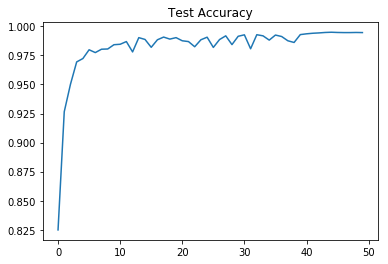

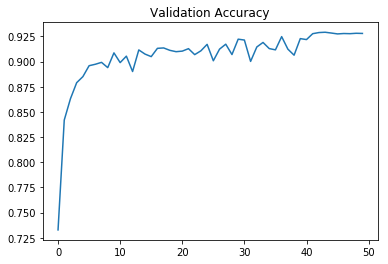

In [21]:
plt.plot(validation_accuracy_plot)
plt.title("Test Accuracy")
plt.show()

plt.plot(test_accuracy_plot)
plt.title("Validation Accuracy")
plt.show()

### Evaluate the model

In [22]:
# Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    validation_accuracy = evaluate(X_validation, y_validation)
    print("Valid Accuracy = {:.3f}".format(validation_accuracy))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 1.000
Valid Accuracy = 0.995
Test Accuracy = 0.928


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [23]:
# maps from class index into human readable text
signname = {}
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    for r in reader:
        if r[0].isdigit():
            signname[int(r[0])] = r[1]
NCLASS = len(signname)

### Load and Output the Images

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Loading and resizing new test images
def read_file_to_32x32_array(file):
    x = Image.open(file).convert("RGB")
    x = x.resize((32,32))
    return np.array(x)

folder = "additional_traffic_signs"
files = [f for f in os.listdir(folder) if f.endswith("png") or f.endswith("jpg")]
# sort the files since the os.listdir returns a result in an arbitrary order
files.sort()
paths = [os.path.join(folder, f) for f in files]
my_labels = [int(f.split('.')[0]) for f in files]


my_images = np.array([read_file_to_32x32_array(f) for f in paths])


### Plot the custom images

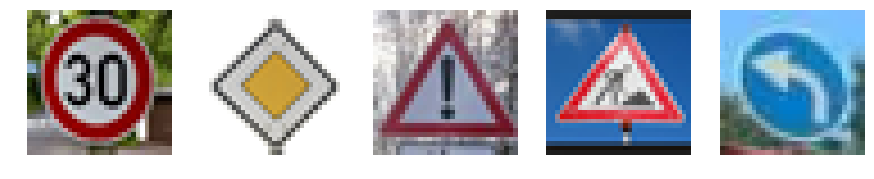

In [25]:
fig, axes = plt.subplots(1,5, figsize=(15, 6))
axes = axes.ravel()
for i in range(len(my_images)):
    image = my_images[i]
    axes[i].axis('off')
    axes[i].imshow(image)
fig.savefig("./output_images/new_sings.png",bbox_inches="tight")

### Predict the Sign Type for Each Image

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def reshape_new_images(imgs):
    def gray(src):
        if src.dtype == np.uint8:
            src = np.array(src/255.0, dtype=np.float32)
        dst = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
        return dst.reshape(32,32,1)
    norms = [gray(img) for img in imgs]
    return np.array(norms)

# preprocess images
my_features = reshape_new_images(my_images)


# Here is a function to predict images and output human readable sign names
def predict(features, human_readable=False):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        results = sess.run(tf.argmax(logits, 1), {x : features})
        print(results)
        if human_readable:
            results = [signname[n] for n in results]
        return results



In [27]:
new_sign_predictions = []
new_sign_predictions = predict(my_features, True)
print (new_sign_predictions)

INFO:tensorflow:Restoring parameters from ./lenet
[ 1 12 18 25 34]
['Speed limit (30km/h)', 'Priority road', 'General caution', 'Road work', 'Turn left ahead']


### Plot the new images with predictions

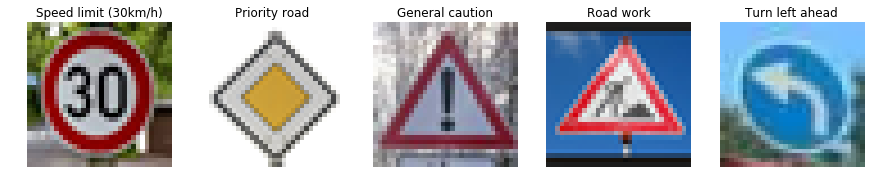

In [28]:
fig, axes = plt.subplots(1,5, figsize=(15, 6))
axes = axes.ravel()
for i in range(len(my_images)):
    image = my_images[i]
    axes[i].axis('off')
    axes[i].imshow(image)
    axes[i].set_title(new_sign_predictions[i])
fig.savefig("./output_images/new_signs_with_label.png",bbox_inches="tight")

### Analyze Performance

In [29]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy = evaluate(my_features, my_labels)
    print("accuracy is {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
accuracy is 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [60]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
            axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()

def prediction_softmax(features):
    with tf.Session() as sess:
        softmax_logits = tf.nn.softmax(logits)
        saver.restore(sess,  tf.train.latest_checkpoint('.'))
        top_5 = sess.run(tf.nn.top_k(softmax_logits, k=5), feed_dict={x:features})
        all_labels = np.unique(y_train)
        for i in range(len(my_images)):
            figures = {}
            labels = {}
        
            figures[0] = my_images[i]
            labels[0] = "Original"
        
            for j in range(5):
                labels[j+1] = 'Guess {} : ({:.0f}%)'.format(j+1, 100*top_5[0][i][j])
                figures[j+1] = X_valid[np.argwhere(y_valid == top_5[1][i][j])[0]].squeeze()
            
            plot_figures(figures, 1, 6, labels)
        return top_5



INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  1.00000000e+00,   1.91059963e-11,   2.49711471e-12,
          2.78415366e-13,   5.58447399e-14],
       [  9.99999881e-01,   1.08551674e-07,   7.66943786e-10,
          3.28170352e-10,   5.84934046e-11],
       [  1.00000000e+00,   1.64644305e-11,   6.21405878e-12,
          9.62183282e-14,   2.08555380e-16],
       [  6.44439638e-01,   3.53678197e-01,   1.43175677e-03,
          2.16142522e-04,   9.58362289e-05],
       [  9.99993205e-01,   4.56538510e-06,   2.20177822e-06,
          1.08201350e-08,   4.65821770e-10]], dtype=float32), indices=array([[ 1,  5,  3,  2,  6],
       [12,  9, 32, 14, 15],
       [18, 26, 27, 20, 37],
       [25, 37, 29, 20, 31],
       [34, 28, 29, 30, 35]], dtype=int32))


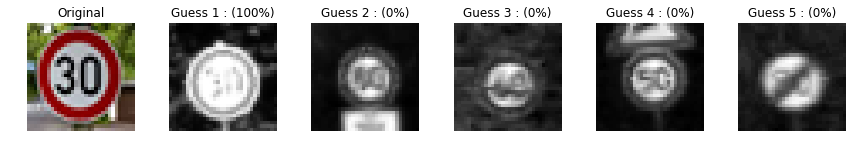

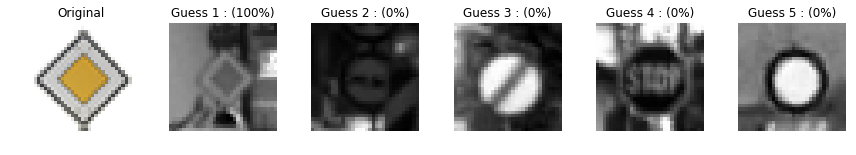

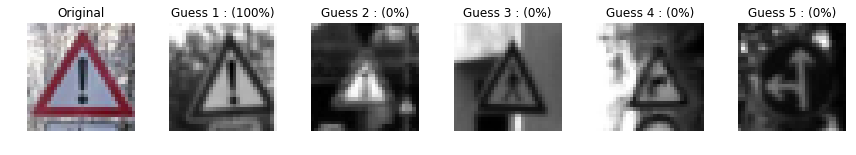

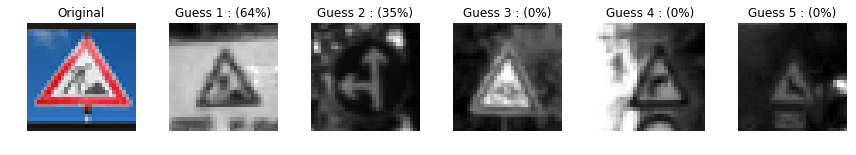

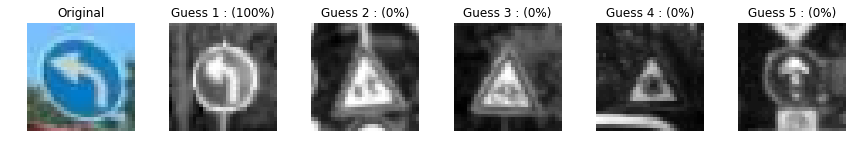

In [61]:
ps = prediction_softmax(my_features)
print(ps)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")